In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Load the training data
train_path = "/content/train_data.txt"
train_data = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

In [3]:
print(train_data.describe())

                                   Title    Genre  \
count                               1603     1603   
unique                              1603       27   
top      3 Secondes et 5 Minutes (2014)    drama    
freq                                   1      399   

                                              Description  
count                                                1603  
unique                                               1603  
top      2012: A family of Cité Balzac, a Paris's immi...  
freq                                                    1  


In [4]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1603 entries, 1 to 1603
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        1603 non-null   object
 1   Genre        1603 non-null   object
 2   Description  1603 non-null   object
dtypes: object(3)
memory usage: 50.1+ KB
None


In [5]:
print(train_data.isnull().sum())

Title          0
Genre          0
Description    0
dtype: int64


In [32]:
# Load the test data
test_path = "/content/test_data_solution.txt"
test_data = pd.read_csv(test_path, sep=':::', names=['Id', 'Title', 'Description'], engine='python')
# Ensure 'Text_cleaning' column is created in test_data
test_data['Text_cleaning'] = test_data['Description'].apply(clean_text)
# Now you can transform the test data
X_test = tfidf_vectorizer.transform(test_data['Text_cleaning'])
test_data.head()

,Id,Title,Description,Text_cleaning
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar...",brane loves life car apartment job especially ...
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...,one year life albin family shepherds north tra...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi...",father died hasnt spoken brother years serious...
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...,known internationally martial arts superstar b...


<ipython-input-7-fe6c755e4b72>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, y='Genre', order=train_data['Genre'].value_counts().index, palette='viridis')
<ipython-input-7-fe6c755e4b72>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts, palette='viridis')


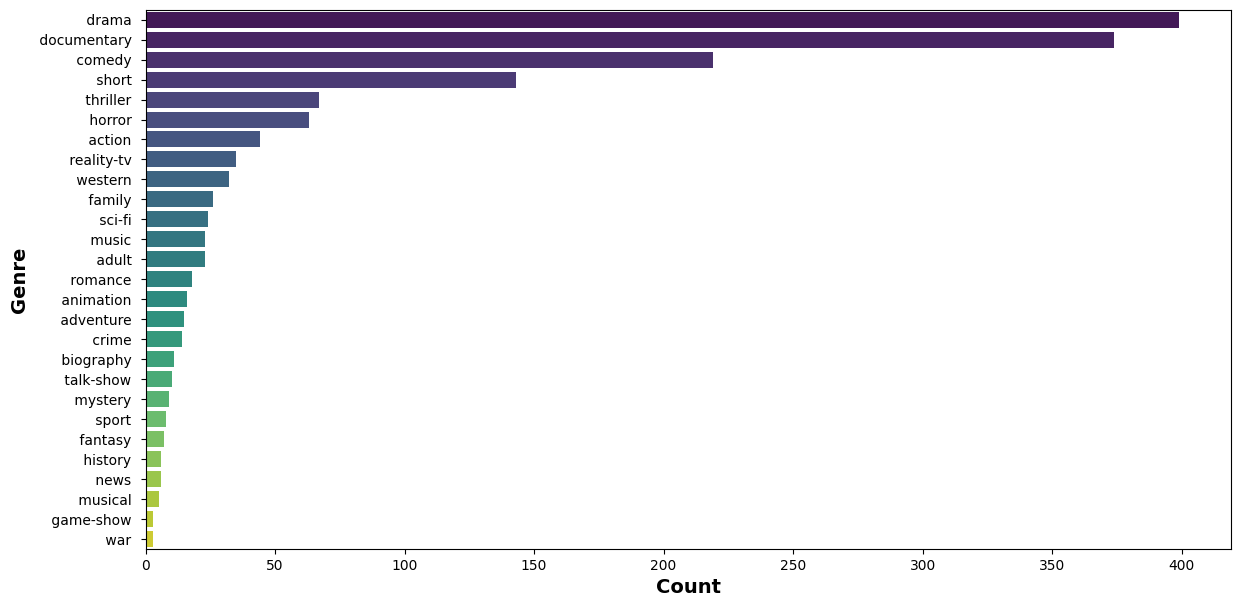

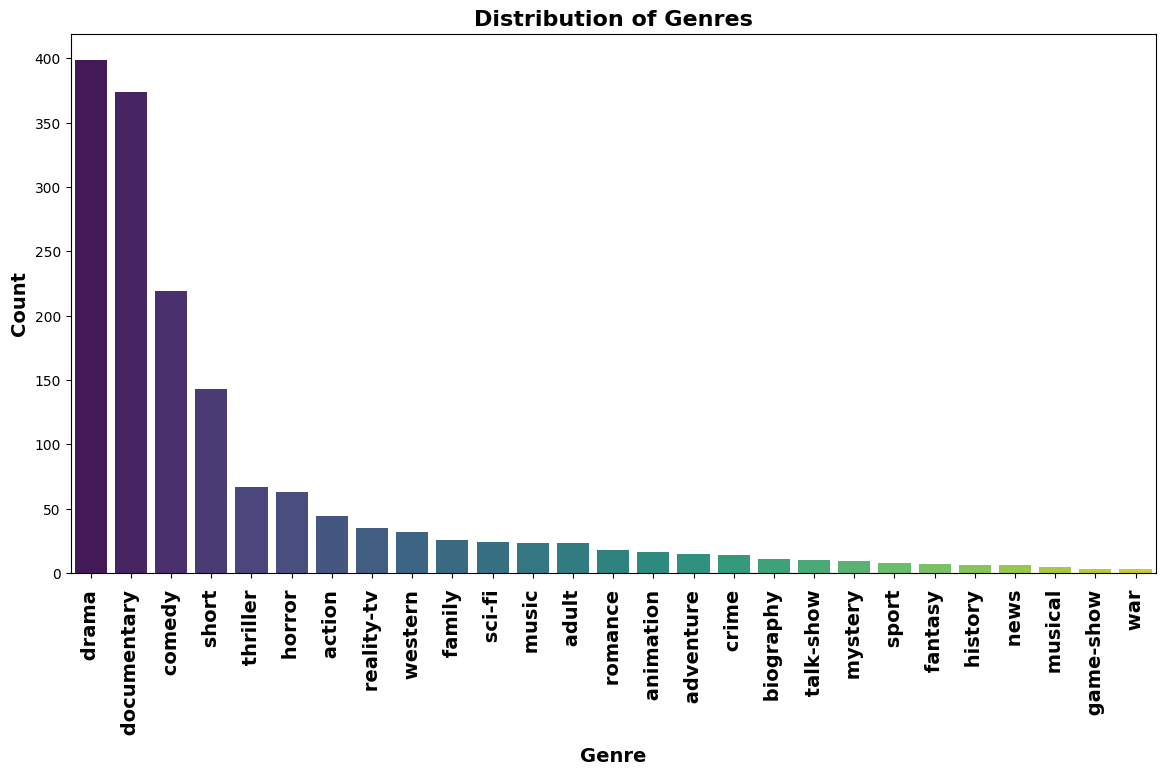

In [7]:
plt.figure(figsize=(14, 7))
sns.countplot(data=train_data, y='Genre', order=train_data['Genre'].value_counts().index, palette='viridis')
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Genre', fontsize=14, fontweight='bold')

plt.figure(figsize=(14, 7))
counts = train_data['Genre'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='viridis')
plt.xlabel('Genre', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()

In [16]:
# Initialize the stemmer and stop words
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

# Define the clean_text function
def clean_text(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text

# Apply the clean_text function to the 'Description' column in the training and test data
train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)
test_data['Text_cleaning'] = test_data['Description'].apply(clean_text)

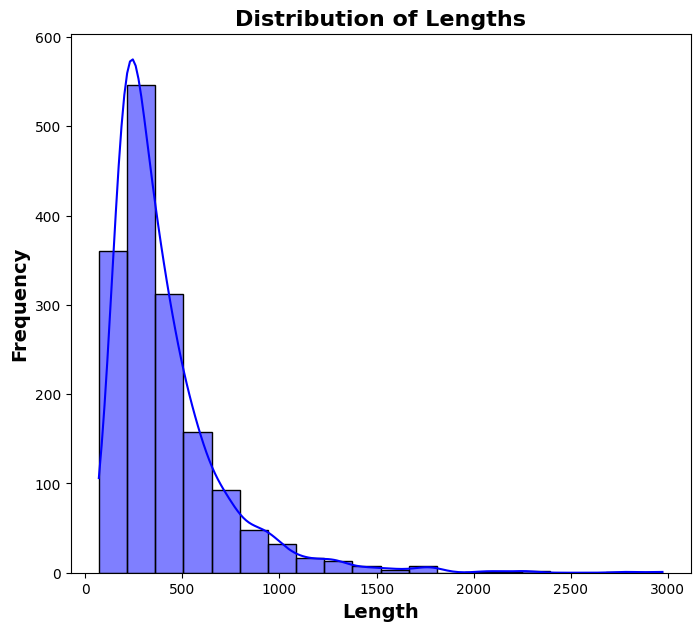

In [19]:
# Calculate the length of cleaned text
train_data['length_Text_cleaning'] = train_data['Text_cleaning'].apply(len)
# Visualize the distribution of text lengths
plt.figure(figsize=(8, 7))
sns.histplot(data=train_data, x='length_Text_cleaning', bins=20, kde=True, color='blue')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')
plt.show()

In [31]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train = tfidf_vectorizer.fit_transform(train_data['Text_cleaning'])

# Transform the test data
X_test = tfidf_vectorizer.transform(test_data['Text_cleaning'])  # Now this line should work

In [33]:

# Split the data into training and validation sets
X = X_train
y = train_data['Genre']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = classifier.predict(X_val)

# Evaluate the performance of the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.37383177570093457
               precision    recall  f1-score   support

      action        0.00      0.00      0.00         9
       adult        0.00      0.00      0.00         4
   adventure        0.00      0.00      0.00         5
   animation        0.00      0.00      0.00         4
   biography        0.00      0.00      0.00         1
      comedy        0.00      0.00      0.00        39
       crime        0.00      0.00      0.00         4
 documentary        0.53      0.61      0.57        80
       drama        0.31      0.99      0.47        72
      family        0.00      0.00      0.00         4
     fantasy        0.00      0.00      0.00         1
      horror        0.00      0.00      0.00        14
       music        0.00      0.00      0.00         6
     mystery        0.00      0.00      0.00         1
        news        0.00      0.00      0.00         2
  reality-tv        0.00      0.00      0.00         6
     romance        0.0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
# Use the trained model to make predictions on the test data
X_test_predictions = classifier.predict(X_test)
test_data['Predicted_Genre'] = X_test_predictions

In [36]:
# Save the test_data DataFrame with predicted genres to a CSV file
test_data.to_csv('predicted_genres.csv', index=False)

# Display the 'test_data' DataFrame with predicted genres
print(test_data)

                                                      Id          Title  \
1                                  Edgar's Lunch (1998)       thriller    
2                              La guerra de papá (1977)         comedy    
3                           Off the Beaten Track (2010)    documentary    
4                                Meu Amigo Hindu (2015)          drama    
5                                     Er nu zhai (1955)          drama    
...                                                  ...            ...   
12894                                 La Madelon (1955)         comedy    
12895                         "Pretty Messed Up" (2017)          short    
12896                                Pulau Hantu (2008)       thriller    
12897   Operación Sodoma: la caída del Mono Jojoy (20...   documentary    
12898                                   Madame X (1929)          drama    

                                             Description  \
1       L.R. Brane loves his life - his